<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import kaleido

# Исследование структуры данных

In [34]:
hh_df = pd.read_csv("data/dst-3.0_16_1_hh_database.csv", sep=";")
hh_df.shape

(44744, 12)

In [35]:
hh_df.head(3)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано


In [36]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

Выведем основную статистическую информацию о столбцах.


In [37]:
hh_df.describe(include="all")

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создадим с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Если посмотреть на наши данные, то видно, что уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуемся этим.



In [38]:
#создаем новый признак "Образование"
hh_df["Образование"] = hh_df["Образование и ВУЗ"].apply(lambda x: x.split()[0].lower()
                                           if x.split()[1] == "образование"
                                           else " ".join(x.split()[:2]).lower())
hh_df["Образование"] = hh_df["Образование"].astype("category")
display(hh_df["Образование"].unique())

# удаляем ненужный больше признак "Образование и ВУЗ"
hh_df.drop(["Образование и ВУЗ"], axis=1, inplace=True)
display(hh_df.shape)

mask = hh_df["Образование"] == "среднее"
display(hh_df[mask].shape)

['неоконченное высшее', 'высшее', 'среднее специальное', 'среднее']
Categories (4, object): ['высшее', 'неоконченное высшее', 'среднее', 'среднее специальное']

(44744, 12)

(559, 12)

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создадим два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.




In [39]:
#выделяем новые признаки пол и возраст
hh_df["Пол"] = hh_df["Пол, возраст"].apply(lambda x: x.split(",")[0][0]).astype("category")
display(hh_df["Пол"].unique())
hh_df["Возраст"] = hh_df["Пол, возраст"].apply(lambda x: x.split(",")[1].split()[0]).astype("uint8")
display(hh_df["Возраст"].unique())

# удаляем ненужный больше признак "Пол, возраст"
hh_df.drop(["Пол, возраст"], axis=1, inplace=True)
display(hh_df.shape)

display(hh_df["Пол"].value_counts(normalize=True))
display(hh_df["Возраст"].mean())


['М', 'Ж']
Categories (2, object): ['Ж', 'М']

array([ 39,  60,  36,  38,  26,  29,  46,  34,  35,  59,  27,  21,  31,
        37,  30,  33,  42,  32,  23,  28,  25,  24,  43,  53,  49,  44,
        48,  54,  22,  20,  40,  62,  72,  45,  41,  61,  50,  58,  57,
        52,  56,  18,  19,  51,  16,  47,  71,  63,  55,  64,  68,  17,
        73,  66,  65,  77,  67,  69,  76,  70,  14,  15, 100], dtype=uint8)

(44744, 13)

М    0.809293
Ж    0.190707
Name: Пол, dtype: float64

32.19674146254246

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…



In [40]:
def get_experience(arg):
    """
    Функция выделения опыта работы в месяцах из строки исходных данных с hh
    Args:
        arg (string): строка с информацией об опыте работе в исходном формате
    Returns:
        Общий опыт работы соискателя в месяцах(int) : если в исходной строке указан возраст
            в формате: "Опыт работы n ["год","года","лет"] m ["месяц", "месяца", "месяцев"]"
            одна часть: m или n может отсутствовать
        NaN : если arg равно NaN или "Не указано" или опыт работы не соответствует
            указанному выше шаблону
    """
    if arg == "Не указано" or arg is np.nan:
        return None    
    args = arg.split()
    year = ["год","года","лет"]
    month = ["месяц", "месяца", "месяцев"]
    if args[3] in year and args[5] in month:
        return int(args[2])*12 + int(args[4])
    elif args[3] in year and args[5] not in month:
        return int(args[2])*12
    elif args[3] not in year and args[3] in month:
        return int(args[2])
    else:
        return None
    
hh_df["Опыт работы (месяц)"] = hh_df["Опыт работы"].apply(get_experience)
display(hh_df["Опыт работы (месяц)"].describe())

# удаляем ненужный больше признак «Опыт работы»
hh_df.drop(["Опыт работы"], axis=1, inplace=True)
display(hh_df.shape)


count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

(44744, 13)

4.  Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначим как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратим внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратим внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.


In [41]:
def remove_metro(arg):
    """Удаляние при наличии поле метро из строки формата:
    <Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам> 
    Args:
        arg (string): исходная строка
    Returns:
        string: <Город , готовность к переезду (города для переезда) , готовность к командировкам>
    """
    args = arg.split(" , ")
    if  "м." in args[1]:
        args.pop(1)
    return " , ".join(args)
        

def get_city(arg):
    """Выделение из строки формата:
    <Город , готовность к переезду (города для переезда) , готовность к командировкам>
    города и преобразование к одной из четырех категорий:
    «Москва», «Санкт-Петербург», «город-миллионник», «другие»
    Args:
        arg (string): исходная строка
    Returns:
        string: 1 строка из [«Москва», «Санкт-Петербург», «город-миллионник», «другие»]
    """
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань',
                      'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа',
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
    
    args = arg.split(" , ")
    if args[0] in ["Москва", "Санкт-Петербург"]:
        return args[0]
    elif args[0] in million_cities:
        return "город-миллионник"
    else:
        return "другие"
    
def get_move_readiness(arg):
    """Выделение из строки формата:
    <Город , готовность к переезду (города для переезда) , готовность к командировкам>
    готовности к командировкам
    Args:
        arg (string): исходная строка
    Returns:
        bool: true - готов иначе False
    """
    args = arg.split(" , ")
    if "не" in args[1]:
        return False
    else:
        return True
    
def get_business_trip_readiness(arg):
    """Выделение из строки формата:
    <Город , готовность к переезду (города для переезда) , готовность к командировкам>
    готовности к командировкам
    Args:
        arg (string): исходная строка
    Returns:
        bool: True - готов иначе False
    """
    args = arg.split(" , ")
    if "командировкам" in args[-1] and  "не" not  in args[-1]:
        return True
    else:
        return False

# Удалим сразу часть со станцией метро если она есть
hh_df["Город, переезд, командировки"] = hh_df["Город, переезд, командировки"].apply(remove_metro)

# Выделяем новый признак город из признака "Город, переезд, командировки"
hh_df["Город"] = hh_df["Город, переезд, командировки"].apply(get_city)
hh_df["Город"] = hh_df["Город"].astype("category")
#display(hh_df["Город"].unique())
display(hh_df["Город"].value_counts(normalize=True))

# Выделяем новый признак готов ли соискатель к переезду из признака "Город, переезд, командировки"
hh_df["Готовность к переезду"] = hh_df["Город, переезд, командировки"].apply(get_move_readiness)

# Выделяем новый признак готов ли соискатель к командировкам
# Из признака "Город, переезд, командировки"
hh_df["Готовность к командировкам"] = hh_df["Город, переезд, командировки"].apply(get_business_trip_readiness)

# удаление обработанного признака
hh_df.drop(["Город, переезд, командировки"], axis=1, inplace=True)
display(hh_df.shape)
    

mask1 = hh_df["Готовность к командировкам"]==True
mask2 = hh_df["Готовность к переезду"]==True
hh_df[mask1&mask2]["Готовность к переезду"].count()/hh_df.shape[0]

Москва              0.371469
другие              0.354327
город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: Город, dtype: float64

(44744, 15)

0.31619881995351334

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.


In [42]:
def get_employment(df):
    """One Hot Encoding для признака "Занятость", преобразует исходный 
    датафрейм созданием признаков-"мигалок" - ["полная занятость", "частичная занятость",
    "проектная работа", "волонтёрство", "стажировка"]
    Args:
        df (pd.DataFrame): исходный DataFrame
    Returns:
        None
    """
    employment = ["полная занятость", "частичная занятость", "проектная работа",
              "волонтерство", "стажировка"]
    for emp in employment:
        df[emp] = df["Занятость"].apply(lambda x: emp in x)
        
def get_schedule(df):
    """One Hot Encoding для признака "График", преобразует исходный 
    датафрейм созданием признаков-"мигалок" - ["полный день", "сменный график", "гибкий график",
            "удалённая работа", "вахтовый метод"]
    Args:
        df (pd.DataFrame): исходный DataFrame
    Returns:
        None
    """
    schedule = ["полный день", "сменный график", "гибкий график",
            "удалённая работа", "вахтовый метод"]
    for shed in schedule:
        df[shed] = df["График"].apply(lambda x: shed in x)
    
get_employment(hh_df)
get_schedule(hh_df)
display(hh_df.shape, hh_df.info())

#Задание 3.5
display((hh_df["проектная работа"] & hh_df["волонтерство"]).value_counts())
display((hh_df["вахтовый метод"] & hh_df["гибкий график"]).value_counts())

# удаление обработанного признака
hh_df.drop(["Занятость","График"], axis=1, inplace=True)
display(hh_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   ЗП                               44744 non-null  object  
 1   Ищет работу на должность:        44744 non-null  object  
 2   Занятость                        44744 non-null  object  
 3   График                           44744 non-null  object  
 4   Последнее/нынешнее место работы  44743 non-null  object  
 5   Последняя/нынешняя должность     44742 non-null  object  
 6   Обновление резюме                44744 non-null  object  
 7   Авто                             44744 non-null  object  
 8   Образование                      44744 non-null  category
 9   Пол                              44744 non-null  category
 10  Возраст                          44744 non-null  uint8   
 11  Опыт работы (месяц)              44574 non-null  float64 
 12  Горо

(44744, 25)

None

False    44308
True       436
dtype: int64

False    42433
True      2311
dtype: int64

(44744, 23)

6. Теперь наш таргет - признак заработной платы **"ЗП"**. 
Помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. 

Обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. 

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).





<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Дату, по которой определяется курс возьмем признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.


Итак,  преобразования: 
1. Переведем признак "Обновление резюме" из таблицы с резюме в формат datetime и достанем из него дату. В тот же формат приведем признак "date" из таблицы с валютами.
2. Выделим из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты переведем в стандарт ISO согласно с таблицей выше.
3. Присоединим к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты. Значение close для рубля заполним единицей 1 (курс рубля самого к себе)
4. Умножим сумму желаемой заработной платы на присоединенный курс валюты (close) и разделим на пропорцию, результат  в новый столбец "ЗП (руб)".


In [43]:
exchange_df = pd.read_csv("data/ExchangeRates.csv")
exchange_df["date"] = pd.to_datetime(exchange_df["date"],dayfirst=True)

hh_df["Обновление резюме"] = pd.to_datetime(hh_df["Обновление резюме"], dayfirst=True).dt.floor("d")


hh_df["Валюта"] = hh_df["ЗП"].apply(lambda x: x.split()[1]).replace(
        ['руб.', 'бел.руб.', 'KZT', 'EUR', 'USD', 'грн.', 'сум', 'KGS','AZN'],
        ['RUB', 'BYN', 'KZT', 'EUR', 'USD', 'UAH', 'UZS', 'KGS','AZN']).astype('category')
hh_df["ЗП"] = hh_df["ЗП"].apply(lambda x: int(x.split()[0]))

hh_df = hh_df.merge(
        exchange_df[["currency", "date", "proportion", "close"]],
        left_on=["Валюта","Обновление резюме"],
        right_on=["currency","date"],
        how="left"
)
hh_df.loc[hh_df["Валюта"]=="RUB",["close","proportion"]]=1

hh_df["ЗП (руб)"]=hh_df["ЗП"]*hh_df["close"]/hh_df["proportion"]
display(hh_df["ЗП (руб)"].describe())

hh_df.drop(["currency", "date", "proportion", "close", "ЗП", "Валюта"], axis=1, inplace=True)
display(hh_df.info())



count    4.474400e+04
mean     7.653354e+04
std      1.359315e+05
min      1.000000e+00
25%      3.708220e+04
50%      5.901900e+04
75%      9.500000e+04
max      2.430488e+07
Name: ЗП (руб), dtype: float64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Ищет работу на должность:        44744 non-null  object        
 1   Последнее/нынешнее место работы  44743 non-null  object        
 2   Последняя/нынешняя должность     44742 non-null  object        
 3   Обновление резюме                44744 non-null  datetime64[ns]
 4   Авто                             44744 non-null  object        
 5   Образование                      44744 non-null  category      
 6   Пол                              44744 non-null  category      
 7   Возраст                          44744 non-null  uint8         
 8   Опыт работы (месяц)              44574 non-null  float64       
 9   Город                            44744 non-null  category      
 10  Готовность к переезду            44744 non-null  bool     

None

# Исследование зависимостей в данных

1. Построим распределение признака **"Возраст"**. 

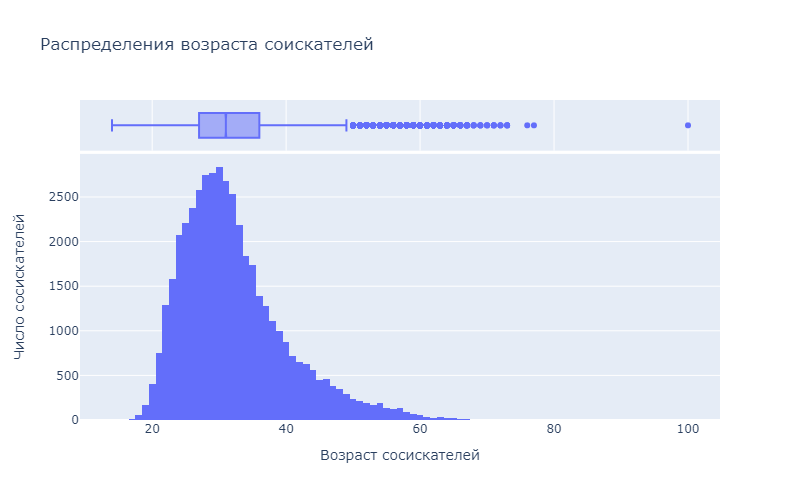

In [44]:
fig = px.histogram(
    hh_df,
    x = "Возраст",
    height=500,
    width=800,
    title="Распределения возраста соискателей",
    marginal="box",
)
fig.update_layout(xaxis_title="Возраст сосискателей", yaxis_title="Число сосискателей")
fig.show("png")

In [45]:
import os
os.sys.path.append("..")
import data_cleaning

#определение интервала, в котором лежит большинство значений
outliers, cleaned = data_cleaning.outliers_iqr_mod(hh_df, "Возраст",True)
display(cleaned["Возраст"].describe())
#outliers, cleaned = data_cleaning.outliers_z_score_mod(hh_df, "Возраст",True)
#display(cleaned["Возраст"].describe())

#анализ на аномальные значения
display(hh_df[(hh_df["Возраст"]-14) < (hh_df["Опыт работы (месяц)"]/12)].sort_values(by="Возраст"))
display(hh_df[(hh_df["Возраст"]>65) & (hh_df["Опыт работы (месяц)"]<360)].sort_values(by="Возраст"))

count    44084.000000
mean        31.809114
std          7.249747
min         18.000000
25%         27.000000
50%         31.000000
75%         36.000000
max         55.000000
Name: Возраст, dtype: float64

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,высшее,М,14,477.0,Москва,...,False,False,False,False,True,False,False,False,False,60000.00
33698,Android Developer - Middle,Klaizar Studio,Android developer,2019-04-13,Не указано,высшее,М,16,34.0,другие,...,True,False,False,False,False,False,False,False,False,122582.49
2781,Менеджер по маркетингу на Youtube,Youtube,Владелец канал,2019-04-11,Не указано,среднее специальное,М,17,70.0,Санкт-Петербург,...,False,False,False,False,True,False,False,False,False,40000.00
29292,Ассистент фотографа,Мосволонтер,Фотограф,2019-04-26,Не указано,среднее специальное,М,17,52.0,Москва,...,True,True,False,False,False,False,True,False,False,10000.00
31054,Программист Java,Google Inc.,Менеджер проекта,2019-04-26,Не указано,высшее,М,17,60.0,другие,...,False,False,False,False,True,False,False,False,False,170151.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,"программист, заместитель руководителя","ОАО ""Научно-исследователький институт точных п...",Ведущий инженер,2018-10-20,Не указано,высшее,М,38,292.0,Москва,...,False,True,False,False,True,False,True,False,False,100000.00
20974,"Директор IT департамента, Управляющий партнёр,...",МКС,Директор департамента IT интеграций,2018-11-09,Не указано,высшее,М,40,328.0,Москва,...,True,True,False,False,True,True,True,False,True,198646.50
40574,Инженер-электронщик,"ООО ""ЧИЖ-Авто""",Инженер по ремонту аудио и видео техники,2019-04-26,Не указано,высшее,М,41,333.0,другие,...,False,False,False,False,True,False,False,False,False,25000.00
32474,Помощник программиста,Триколор ТВ,Специалист технической поддержки,2019-05-07,Не указано,высшее,М,43,369.0,город-миллионник,...,True,True,False,True,True,True,True,False,False,20000.00


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
13321,сетевой администратор,none,freelancer,2019-04-08,Имеется собственный автомобиль,высшее,М,66,272.0,Москва,...,False,False,False,False,False,False,False,False,False,140000.0
20848,Ведущий специалист по работе со сторонними пос...,ЗАО Магистраль,Генеральный директор,2019-04-19,Имеется собственный автомобиль,высшее,М,66,61.0,Санкт-Петербург,...,False,False,False,False,True,False,False,False,False,65000.0
33707,"Инженер,начальник участка",ЗАО Сервико,начальник производства,2019-04-08,Не указано,высшее,М,66,170.0,Москва,...,False,False,False,False,True,False,False,False,False,100000.0
34316,Программист мониторинг окружающей среды,ФЦГС Экология,Начальник лаборатории,2018-08-03,Не указано,высшее,М,66,232.0,Москва,...,True,True,False,False,True,True,True,False,False,100000.0
12737,Программист баз данных,"ООО ""Служба налогоплательщика""",Программист-разработчик,2019-05-13,Не указано,высшее,М,67,257.0,другие,...,False,False,False,False,True,False,False,False,False,60000.0
30061,Специалист поддержки рабочих мест [id10408],ЦБ РФ,Ведущий инженер проекта,2019-04-09,Не указано,высшее,М,67,282.0,Санкт-Петербург,...,False,False,False,False,True,False,False,False,False,60000.0
20990,Технический специалист,"Канал имени Москвы, ФГУП",ведущий инженер,2019-04-10,Имеется собственный автомобиль,высшее,М,68,68.0,другие,...,False,False,False,False,True,False,False,False,False,120000.0
43381,Программист Navision,ООО ПРОФФИ-Стиль,Программист-разработчик,2019-04-26,Не указано,высшее,М,68,224.0,Москва,...,True,False,False,False,True,False,True,False,False,120000.0
44725,Копирайтер,"Интернет-магазин ""OZON.ru""","копирайтер, контент-менеджер, администратор сайта",2019-04-08,Не указано,высшее,М,68,149.0,Москва,...,True,False,False,False,False,False,False,False,False,10000.0
12424,"Специалист обработки документов, открытия лице...",ИКБ «ОЛМА-Банк» (ООО),Главный бухгалтер,2019-04-14,Не указано,высшее,Ж,69,144.0,Москва,...,False,False,False,False,True,False,False,False,False,45000.0


По графику распределения возраста соискателей видно, что:
- мода равна 30 лет,
- минимальный возраст - 14,
- максимальный - 100.

Так как распределение напоминает логнормальное, чтобы ответить на вопрос об интервале, в котором находится возраст большинства соискателей, корректнее будет дать ответ не по полученному графику "ящик с усами", по которому (метод межквартильного размаха) мы бы ответили от 14 до 49, а используя сначала логарифмирование, тогда получим от 18 до 55 лет.
Если использовать метод Z-Score, интервал большинства значений будет от 14 до 55лет.

Если рассматривать отдельно признак возраста, на первый взляд, под аномалии попадают значение возраста больше 60-65 лет, так как, например, обращаясь к статистике по выходу на пенсию за 2018 год, средний возраст увольнения с работы и уход на пенсию равнялся 64-65 лет (+ несколько лет до этого человек обычно работает на последнем месте работы и не размещает объявление на hh).

Однако чтобы точнее ответить на этот вопрос (*правда в этом случае мы получаем уже не конкретно анамалии для признка возраста, а анамалии связки 2х признаков*) выведем записи, в которых явно расходится возраст соискателя и его опыт работы (человек проработал больше чем прожил -14лет(минимальный возраст выхода на работу) или человеку больше 65, а опыт работы меньше 30 лет): 
``` python
display(hh_df[(hh_df["Возраст"]-14) < (hh_df["Опыт работы (месяц)"]/12)].sort_values(by="Возраст"))
display(hh_df[(hh_df["Возраст"]>65) & (hh_df["Опыт работы (месяц)"]<360)].sort_values(by="Возраст"))
```
Получаем 73 значений в первом случае и 16 во втором, которые скорее всего являются анамалиями, так
в полученных записях видим сильное расхождние между рассматриваемы признаками, например 40 лет опыта работы в 14лет либо 3 года в 100 лет. Однако тут трудно с первого взгляда оценить, значение какого признака (опыт или возраст) аномальное.

---

2. Построим распределение признака **"Опыт работы (месяц)"**. 

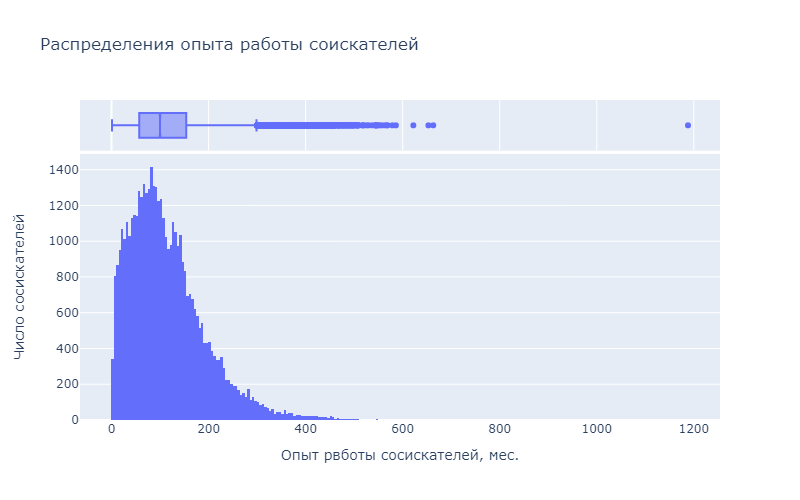

In [46]:
fig = px.histogram(
    hh_df,
    x = "Опыт работы (месяц)",
    height=500,
    width=800,
    title="Распределения опыта работы соискателей",
    marginal="box",
    # nbins=1200 # для нахождения моды
)
fig.update_layout(xaxis_title="Опыт рвботы сосискателей, мес.", yaxis_title="Число сосискателей")
fig.show("png")

In [47]:
#определение интервала, в котором лежит большинство значений
outliers, cleaned = data_cleaning.outliers_iqr_mod(hh_df, "Опыт работы (месяц)",True)
display(cleaned["Опыт работы (месяц)"].describe())
outliers, cleaned = data_cleaning.outliers_z_score_mod(hh_df, "Опыт работы (месяц)",True)
display(cleaned["Опыт работы (месяц)"].describe())

#анализ на аномальные значения
display(hh_df[(hh_df["Возраст"]-14) < (hh_df["Опыт работы (месяц)"]/12)].sort_values(by="Возраст"))

count    42936.000000
mean       118.472401
std         77.505067
min         13.000000
25%         62.000000
50%        103.000000
75%        157.000000
max        663.000000
Name: Опыт работы (месяц), dtype: float64

count    44092.000000
mean       115.603216
std         78.456404
min          6.000000
25%         58.000000
50%        101.000000
75%        155.000000
max        663.000000
Name: Опыт работы (месяц), dtype: float64

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
29098,Ведущий инженер-программист,"КБ Аметист, Концерн АГАТ",Ведущий инженер-программист,2019-04-26,Не указано,высшее,М,14,477.0,Москва,...,False,False,False,False,True,False,False,False,False,60000.00
33698,Android Developer - Middle,Klaizar Studio,Android developer,2019-04-13,Не указано,высшее,М,16,34.0,другие,...,True,False,False,False,False,False,False,False,False,122582.49
2781,Менеджер по маркетингу на Youtube,Youtube,Владелец канал,2019-04-11,Не указано,среднее специальное,М,17,70.0,Санкт-Петербург,...,False,False,False,False,True,False,False,False,False,40000.00
29292,Ассистент фотографа,Мосволонтер,Фотограф,2019-04-26,Не указано,среднее специальное,М,17,52.0,Москва,...,True,True,False,False,False,False,True,False,False,10000.00
31054,Программист Java,Google Inc.,Менеджер проекта,2019-04-26,Не указано,высшее,М,17,60.0,другие,...,False,False,False,False,True,False,False,False,False,170151.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3628,"программист, заместитель руководителя","ОАО ""Научно-исследователький институт точных п...",Ведущий инженер,2018-10-20,Не указано,высшее,М,38,292.0,Москва,...,False,True,False,False,True,False,True,False,False,100000.00
20974,"Директор IT департамента, Управляющий партнёр,...",МКС,Директор департамента IT интеграций,2018-11-09,Не указано,высшее,М,40,328.0,Москва,...,True,True,False,False,True,True,True,False,True,198646.50
40574,Инженер-электронщик,"ООО ""ЧИЖ-Авто""",Инженер по ремонту аудио и видео техники,2019-04-26,Не указано,высшее,М,41,333.0,другие,...,False,False,False,False,True,False,False,False,False,25000.00
32474,Помощник программиста,Триколор ТВ,Специалист технической поддержки,2019-05-07,Не указано,высшее,М,43,369.0,город-миллионник,...,True,True,False,True,True,True,True,False,False,20000.00


По графику распределения "Опыт работы (месяц)" соискателей видно, что:
- мода равна 81 месяц,
- минимальный опыт - 1 месяц,
- максимальный - 1188.

Так как распределение напоминает логнормальное, чтобы ответить на вопрос об интервале, в котором находится опыт большинства соискателей, корректнее будет дать ответ не по полученному графику "ящик с усами", по которому (метод межквартильного размаха) мы бы ответили от 1 до 299, а используя сначала логарифмирование, тогда получим от 13 до 663 месяцев.
Если использовать метод Z-Score, интервал большинства значений будет от 6 до 663.

Если рассматривать отдельно признак, видим явно аномальное значение 1188 мес (99 лет).

Также можно аналогично прошлому заданию рассмотреть аномалии связки двух признаков (опыт и возраст соискателя):

``` python
display(hh_df[(hh_df["Возраст"]-14) < (hh_df["Опыт работы (месяц)"]/12)].sort_values(by="Возраст"))
display(hh_df[(hh_df["Возраст"]>65) & (hh_df["Опыт работы (месяц)"]<360)].sort_values(by="Возраст"))
```
Получаем 73 значений в первом случае и 16 во втором, которые скорее всего являются анамалиями, так
в полученных записях видим сильное расхождние между рассматриваемы признаками. Однако тут трудно с первого взгляда оценить, значение какого признака (опыт или возраст) аномальное.

---



3. Построим распределение признака **"ЗП (руб)"**. 

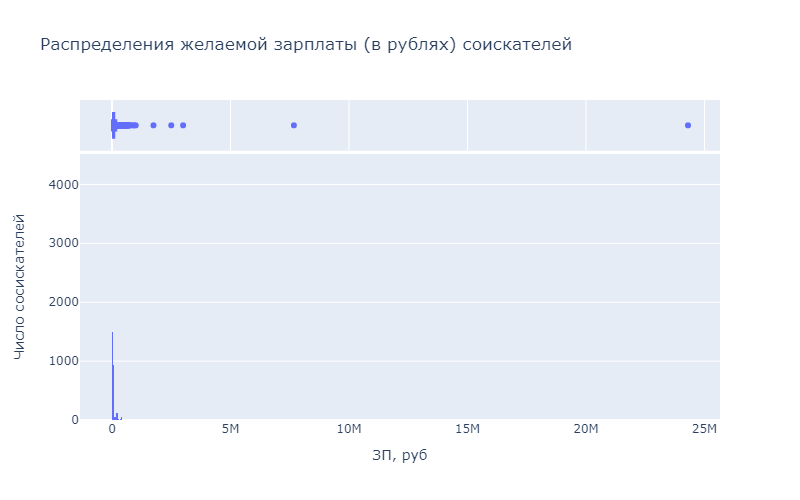

In [48]:
fig = px.histogram(
    hh_df,
    x = "ЗП (руб)",
    height=500,
    width=800,
    title="Распределения желаемой зарплаты (в рублях) соискателей",
    marginal="box",
    
)
fig.update_layout(xaxis_title="ЗП, руб", yaxis_title="Число сосискателей")
fig.show("png")

In [49]:
outliers, cleaned = data_cleaning.outliers_iqr_mod(hh_df, "ЗП (руб)",True)
display(cleaned["ЗП (руб)"].describe())
outliers, cleaned = data_cleaning.outliers_z_score_mod(hh_df, "ЗП (руб)",True, right=2.5 )
display(cleaned["ЗП (руб)"].describe())

display(hh_df[hh_df["ЗП (руб)"]>1000000].sort_values(by= "ЗП (руб)"))

count     44410.000000
mean      74824.046146
std       56339.721490
min        9159.420000
25%       39000.000000
50%       59552.850000
75%       90000.000000
max      387102.600000
Name: ЗП (руб), dtype: float64

count     44429.000000
mean      74752.698118
std       56253.119256
min        6396.020000
25%       38807.640000
50%       59079.650000
75%       90000.000000
max      382893.200000
Name: ЗП (руб), dtype: float64

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
41924,Project manager,Тинькофф Банк,Технолог автоматизации бизнес-процессов,2019-04-22,Не указано,неоконченное высшее,М,24,39.0,Москва,...,True,True,False,False,True,False,True,False,False,1750000.0
43134,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,высшее,М,38,97.0,Москва,...,False,False,False,False,True,False,False,False,False,2500000.0
28253,"Руководитель IT проектов, Роботизация, Автомат...",HAMSTER ROBOTICS,Заместитель директора,2019-04-27,Имеется собственный автомобиль,высшее,М,39,280.0,Москва,...,True,True,False,False,True,False,True,False,True,3000000.0
39191,Специалист по IT,"ТОО ""AMS""",Системный администратор,2019-04-22,Не указано,среднее специальное,М,29,98.0,другие,...,False,False,False,False,True,False,False,False,False,7675224.0
6931,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,2019-04-22,Не указано,высшее,М,31,115.0,другие,...,True,True,False,False,True,True,True,False,False,24304876.0


По графику "Распределения желаемой зарплаты (в рублях) соискателей" видно, что:
- мода - интервал 47500-52490 р.,
- минимальная ЗП - 1 р.,
- максимальная ~ 24,3 млн.

Так как распределение напоминает логнормальное, чтобы ответить на вопрос об интервале, в котором находится опыт большинства соискателей, корректнее будет дать ответ не по полученному графику "ящик с усами", по которому (метод межквартильного размаха) мы бы ответили от 1 до 180 000руб., а используя сначала логарифмирование, тогда получим от 9159 до 387 103руб.

Если использовать метод Z-Score с базовым значением $3\sigma$ , интервал большинства значений будет от 6396 до 517898, однако так как у нас есть выброс со значением в 24 млн, уменьшим правую границу на пол сигмы и получаем интервал от 6396 до 382893руб.

Для опредения, какие значения можно считать аномалиями, рассмрим записи с желаемой зарплатой от 1 млн руб.. Я бы причислил к аномалиям 2 последних значения 7675224.0 и 24304876.0, так как если рассмотреть запись целиком, видно, что такие зарплаты не соответствуют желаемым позициям и опыту кандидатам.

Для дальнейшего выявления аномалий, уже требуется более глубокий анализ взаимосвязи данного признака с другими.

---


4. Построим диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используем для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.


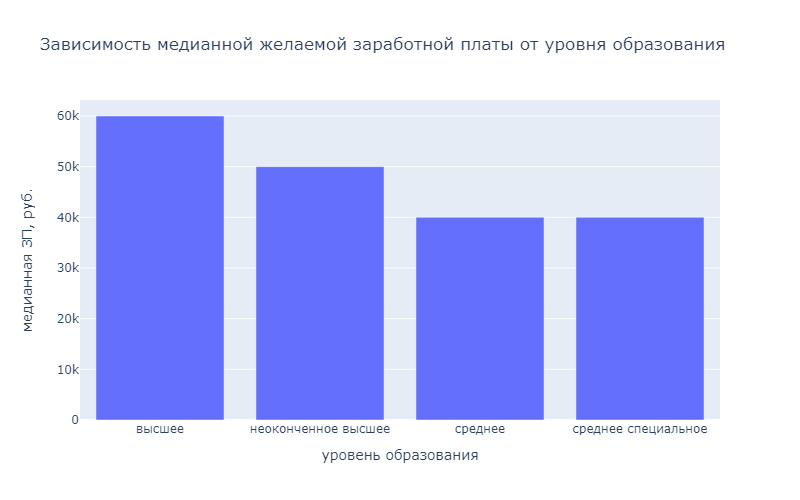

In [50]:
mask = hh_df["ЗП (руб)"]<1000000
df = hh_df[mask][["Образование","ЗП (руб)"]].groupby(by="Образование",as_index=False).median()
fig = px.bar(
    df,
    y = "ЗП (руб)",
    x="Образование",
    height=500,
    width=800,
    title="Зависимость медианной желаемой заработной платы от уровня образования",
    
)
fig.update_layout(xaxis_title="уровень образования", yaxis_title="медианная ЗП, руб.")
fig.show("png")

Наибольший уровень желаемой заработной платы для соискателей с высшим образованием - медиана 60к руб,
наименьший - со средним и средним специальным - 40к руб.

При прогнозировании заработной платы уровень образования соискателя будет особенно важен, когда у человека отсутствует либо небольшой опыт работы, дальше важность уровня образования будет уменьшаться, уступая важности другим признаков, например, как опыт работы (количество лет, и занимаемые ранее позиции). Также важность признака образования будет зависить от сферы работы соискателя, к примеру, взаимосвязь зарплаты и образования в гос. секторе сильнее чем в IT.

---

5. Построим диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используем для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.


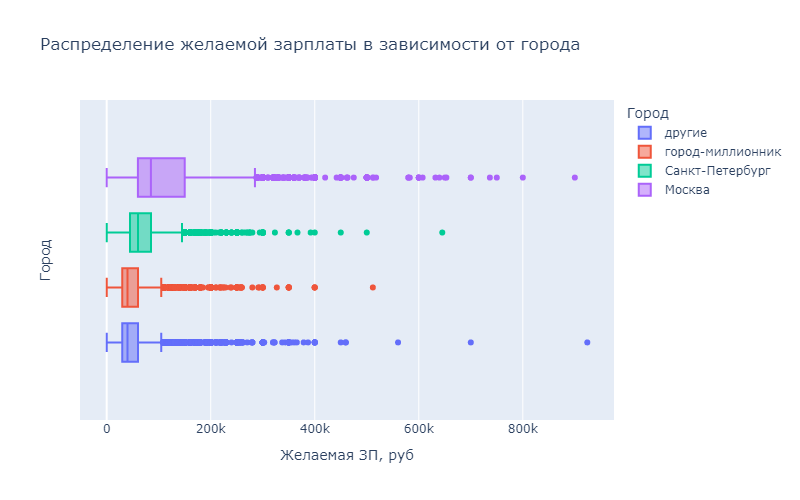

In [51]:
mask = hh_df["ЗП (руб)"]<1000000
fig = px.box(
    hh_df[mask].sort_values(by="Город", ascending=False),
    x = "ЗП (руб)",
    color = "Город",
    height=500,
    width=800,
    title="Распределение желаемой зарплаты в зависимости от города",
)
fig.update_layout(xaxis_title="Желаемая ЗП, руб", yaxis_title="Город")
fig.show("png")

Самые высокие желаемые ЗП (так и их размах, причем как обсолютный так и относительный) у соискателей из Москвы: медиана - 85к первый квартиль -60к, третий 150к руб.,

Затем следует Санкт-Петербург: медиана - 60к первый квартиль -44.6к, третий 85к руб., 

после идут города-миллионники и "остальные", с примерно одинаковым распределением: медиана - 40к первый квартиль -30к, третий 60к руб.

Наибольшее максимальное значение в "другие" - 924к руб., наименьшее -512к- в категории "города-миллионники".

Интересно отметить, что хоть размах желаемой зарплаты в абсолютных значениях в Санкт-Петербурге больше, чем в остальных регионах (исключая Москву), относительный (сравнивая с медианой) размах при этом меньше всех.
Также в категории "остальные" видим больше выбросов "справа", чем в остальных регионах, однако и количество записей там сравнимо только с Москвой и болше Питера и остальных миллионников.

Признак города важен при прогнозе зарплаты, однако более важен город самой работы, а не город проживания кандидата, который мы и рассматривали сейчас, так как некоторые люди готовы к преезду, а некоторые вакансии подразумевают удаленную работу из любой точки страны или мира, и соответственно кандидаты будут претендовать на зарплату по рынку региона в котором будут трудоустроены, а не откуда они.

---

6. Построим **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. 

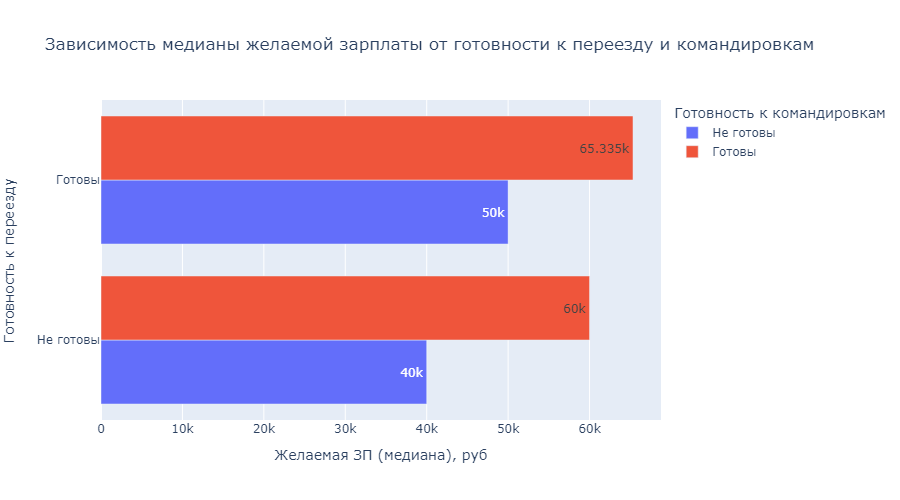

In [52]:
df = hh_df[["Готовность к командировкам", "Готовность к переезду","ЗП (руб)"]].groupby(
    by=["Готовность к командировкам", "Готовность к переезду"], as_index=False)["ЗП (руб)"].median()

fig = px.bar(
    df,
    x = "ЗП (руб)",
    y = df["Готовность к переезду"].apply(lambda x: "Готовы" if x else "Не готовы"),
    color = df["Готовность к командировкам"].apply(lambda x: "Готовы" if x else "Не готовы"),
    height=500,
    width=900,
    title="Зависимость медианы желаемой зарплаты от готовности к переезду и командировкам",
    barmode="group",
    text_auto=True,
    labels={"color":"Готовность к командировкам"}

)

fig.update_layout(xaxis_title="Желаемая ЗП (медиана), руб", yaxis_title="Готовность к переезду")
fig.show("png")

По построенному графику видно, что:
* самый высокий уровень медианы желаемой зарплаты у соискателей готовых и к переезду и к командировкам,
* самый низкий у кандидатов не готовым ни к командировкам ни к преезду,
* Готовность к командировкам сильнее увеличивает уровень желаемой зарплаты, чем готовность к переезду, поэтому видим, что желаемая зарплата больше у готовых к командировкам и не готовых к переезду, чем у готовых к переезду и не готовых к командировкам.

---

7. Построим сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице построим **тепловую карту**. 

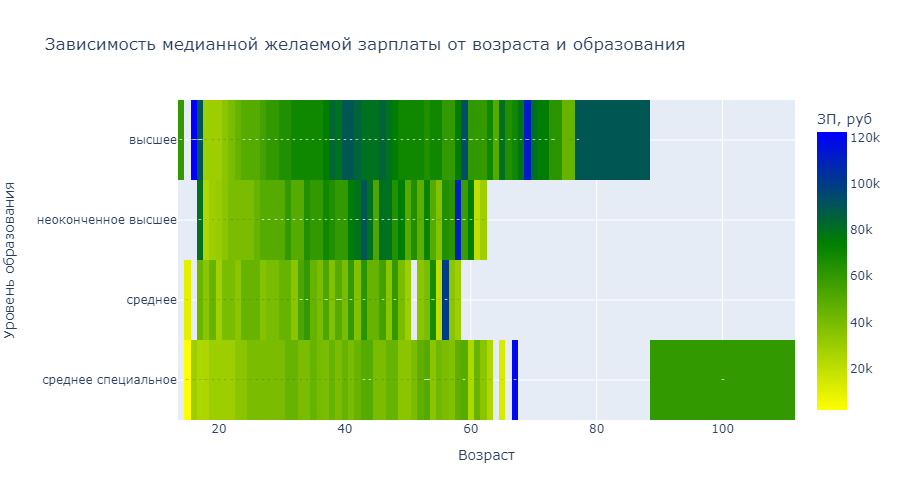

In [53]:
pivot = hh_df.pivot_table(
    index=["Образование"],
    columns=hh_df["Возраст"],
    values=["ЗП (руб)"],
    aggfunc="median"
)

fig = px.imshow(
    pivot,
    labels={'color': 'ЗП, руб', "x":"Возраст"},
    color_continuous_scale =[(0, "yellow"), (0.6, "green"), (1, "blue")],
    title='Зависимость медианной желаемой зарплаты от возраста и образования',
    width=900,
    height=500,
    text_auto=True,
    x=list(zip(*(pivot.columns)))[1],
    )
fig.update_layout(xaxis_title="Возраст", yaxis_title="Уровень образования")
fig.show("png")

По построенной тепловой карте видим, что:
* самый быстрый карьерный рост у людей с высшим образованием с пиком к 40 годам, после чего с возрастом уровень зарплат немного снижается,  
* у людей с неоконченным высшим рост медленние, пик зарплат наступает чуть позже - к 43-44,
* у людей со средним специальным и средним образованием четко выраженного пика нет, зарплата немного возрастает в районе 20-25 лет после чего остается примерно одинаковой до старости, вначале видим несовершеннолетних кандидатов (до 18) с небольшой желаемой зарплатой.
* По нашим данным видно, что чем выше уровень образования, тем дольше работают люди (перед выходом на пенсию): как правило низкоквалифицированная работа связана с физической нагрузкой и более ранним выходом на пенсию.
* Видим также анамальные значения в начале графиков категорий "высшее" и "неоконченное высшие", так как получить такой уровень в таком молодом возрасте практически невозможно (ну или данные соискатели вундеркинды), также видим анамалию в категории "среднее специальное" с значением в 100 лет.

---

8. Построим **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведем из месяцев в года, чтобы признаки были в едином масштабе. Построим на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

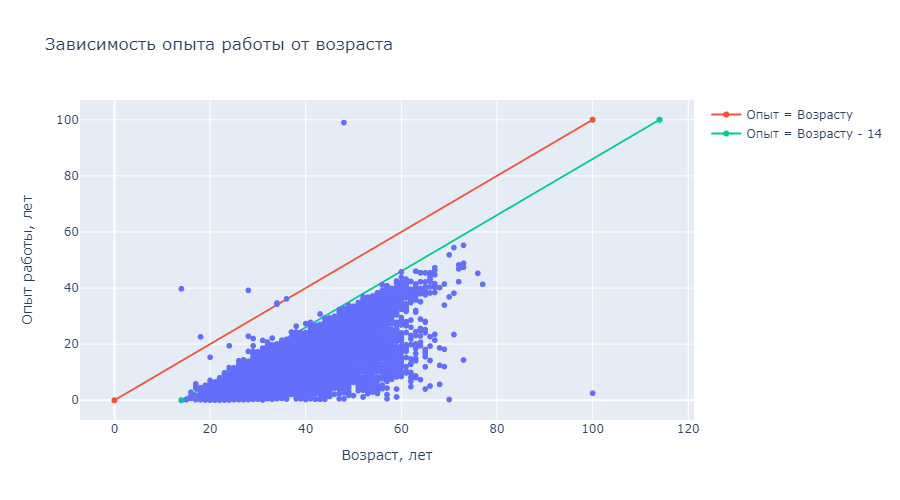

In [54]:
import plotly
fig = px.line(
    x=[0, 100], y=[0, 100]
)
#fig = fig.add_scatter(
fig = px.scatter(
    hh_df,
    y = hh_df["Опыт работы (месяц)"] / 12,
    x = "Возраст",
    labels={"y":"Опыт работы"},
    title="Зависимость опыта работы от возраста",
    width=900,
    height=500,
    
)
fig.update_layout(xaxis_title="Возраст, лет", yaxis_title="Опыт работы, лет")

fig.add_trace(plotly.graph_objs.Scatter(x=[0,100], y=[0,100], name = "Опыт = Возрасту"))
fig.add_trace(plotly.graph_objs.Scatter(x=[14,114], y=[0,100], name = "Опыт = Возрасту - 14"))
fig.show("png")

Построив дополнительную прямую (на графике красным) "Опыт работы"="Возраст", мы сразу видим анамальные значения записей - соответсующие точкам лежащим выше этой прямой (возраст не может быть меньше опыта работы) что точки которые лежат выше этой прямой.

Однако на самом деле, так как работать начинают не с рождения, построим дополнительную пряму (на графике зеленым) "Опыт работы"="Возраст" - 14 лет (по нынешним законам минимальный возраст для работы), видим, что точек которые лежат над ней (аномалий) еще больше, чем в первом случае.

Также скорее всего аномалиями являются значения, когда человеку за 30 лет, а его опыт стремится к 0 (точки лежащии близко к оси x), но такие записи надо рассматривать отдельно.

---

9. Исследуем распределение признака "Возраста" в разрезе "Готовности к командировкам" и пола соискателя.

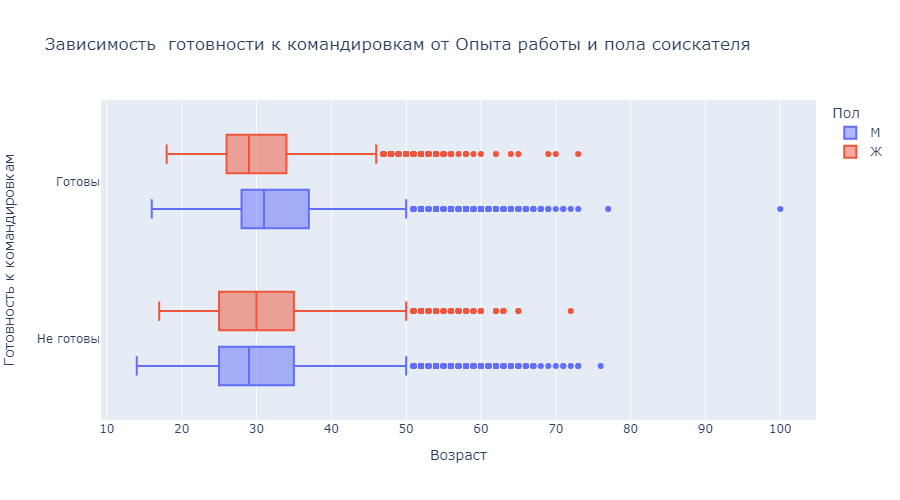

In [55]:

fig = px.box(
    hh_df,
    x = "Возраст",
    color = "Пол",
    y = hh_df["Готовность к командировкам"].apply(lambda x: "Готовы" if x else "Не готовы"),
    height=500,
    width=900,
    title="Зависимость  готовности к командировкам от Опыта работы и пола соискателя",
    labels={"y":"Готовность к командировкам"},
    orientation="h"
)

fig.update_layout(xaxis_title="Возраст", yaxis_title="Готовность к командировкам")
fig.show("png")

По построенной диаграмме "ящик с усами" видим, что:
* Распределение возраста среди тех, кто **не готов** к командировкам примерно одинаковое что у мужчин, что у женщин. q1 = 25, медиана 29-30 и q3=35лет.
* Распределение возраста женщин практически не зависит от готовности к командировкам: 26,29,34 у готовых против 25, 30, 35 у не готовых (q1, median,q3).
* Среди мужчин, больше готовы к командировкам соискатели постарше: 28,31,37 у готовых против 25, 29, 35 у не готовых (q1, median,q3).
* если сравнивать q1, медианой и q3 распределения возраста соискателей по всем данным - (27,31,36), можно сделать вывод, что среди женщин готовы к командировкам более молодые сосискательницы, а мужчины наоборот готовы к коммандировкам в более зрелом возрасте.

---


10. Исследуем соотношение соискателей по признаку готовности к гибкому графику работы в разрезе пола.

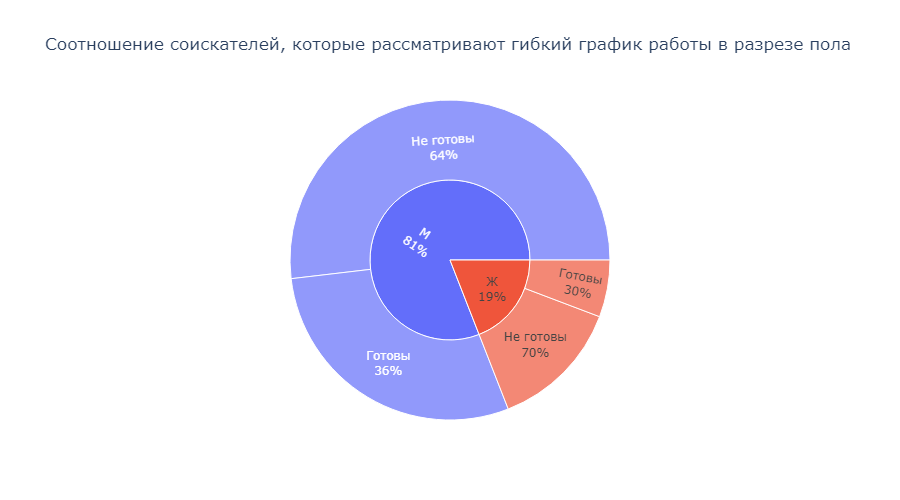

In [56]:
df = hh_df.groupby('Пол', as_index=False)["гибкий график"].value_counts()
df["гибкий график"] = df["гибкий график"].apply(lambda x: "Готовы" if x else "Не готовы")
fig = px.sunburst(
    df,
    path=["Пол", "гибкий график"],
    values="count",
    labels={'parent': 'Пол соискателя', 'labels': 'хотят иметь гибкий график', 'count': 'Количество человек'},
    title='Соотношение соискателей, которые рассматривают гибкий график работы в разрезе пола',
    width=900,
    height=500,
)

fig.update_traces(textinfo='label+percent parent')
fig.show("png")

Во первых, по построенному графику видно, что вообще соискателей мужского пола примерно в 4 раза больше чем женского.
А также видно, что мужчины чаще готовы (36%) к гибкому графику, чем женщины(30%).

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдем **полные дубликаты** в таблице с резюме и удалите их. 

In [57]:
display(hh_df.shape)
hh_df.drop_duplicates(hh_df.columns, inplace=True)
display(hh_df.shape)

(44744, 23)

(44583, 23)

2. Займемся пропусками. Выведем информацию **о числе пропусков** в столбцах. 

In [58]:
hh_df.isnull().sum()

Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                168
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
частичная занятость                  0
проектная работа                     0
волонтерство                         0
стажировка                           0
полный день                          0
сменный график                       0
гибкий график                        0
удалённая работа                     0
вахтовый метод                       0
ЗП (руб)                             0
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалим строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполним **медианным** значением.

In [59]:
hh_df.dropna(subset=["Последнее/нынешнее место работы","Последняя/нынешняя должность"],
            how="any", axis=0, inplace=True)

values = {
       'Опыт работы (месяц)': hh_df["Опыт работы (месяц)"].median(),
}
hh_df.fillna(values, inplace=True)

display(hh_df.isnull().mean())
display(hh_df["Опыт работы (месяц)"].mean())

Ищет работу на должность:          0.0
Последнее/нынешнее место работы    0.0
Последняя/нынешняя должность       0.0
Обновление резюме                  0.0
Авто                               0.0
Образование                        0.0
Пол                                0.0
Возраст                            0.0
Опыт работы (месяц)                0.0
Город                              0.0
Готовность к переезду              0.0
Готовность к командировкам         0.0
полная занятость                   0.0
частичная занятость                0.0
проектная работа                   0.0
волонтерство                       0.0
стажировка                         0.0
полный день                        0.0
сменный график                     0.0
гибкий график                      0.0
удалённая работа                   0.0
вахтовый метод                     0.0
ЗП (руб)                           0.0
dtype: float64

114.35777573405711

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалим резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [60]:
outliers = hh_df[(hh_df["ЗП (руб)"]>1000000)|(hh_df["ЗП (руб)"]<1000)]
display(outliers.shape)
hh_df.drop(outliers.index, axis=0, inplace=True)

(89, 23)

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдем такие резюме и удалите их из данных


In [61]:
outliers = hh_df[(hh_df["Опыт работы (месяц)"] / 12)>hh_df["Возраст"]]
display(outliers.shape)
hh_df.drop(outliers.index, axis=0, inplace=True)

(7, 23)

6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Построим распределение признака в **логарифмическом масштабе**. Добавим к графику линии, отображающие **среднее и границы интервала метода трех сигм**. 

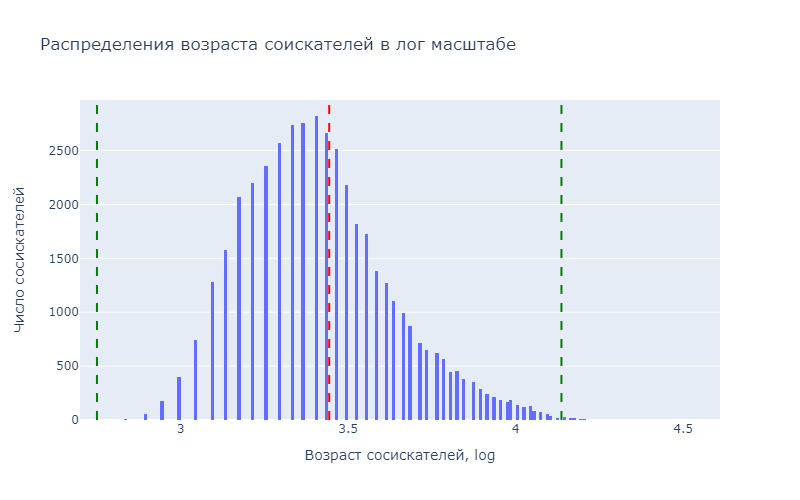

0.4523422276053838

In [62]:
fig = px.histogram(
    hh_df,
    x = np.log(hh_df["Возраст"]),
    height=500,
    width=800,
    title="Распределения возраста соискателей в лог масштабе",
    labels={"count": "число соискателей"}
)

fig.add_vline(x=(np.log(hh_df["Возраст"])).astype(float).mean(),line_dash="dash", line_color="red")
fig.add_vline(x=(np.log(hh_df["Возраст"])).astype(float).mean() -
              3*(np.log(hh_df["Возраст"])).astype(float).std(),line_dash="dash", line_color="green")
fig.add_vline(x=(np.log(hh_df["Возраст"])).astype(float).mean() +
              3*(np.log(hh_df["Возраст"])).astype(float).std(),line_dash="dash", line_color="green")
fig.update_layout(xaxis_title="Возраст сосискателей, log", yaxis_title="Число сосискателей")
fig.show("png")

display((np.log(hh_df["Возраст"].astype(float))).skew())

По графику распределения возраста в log масштабе видим, что оно имеет правостороннию асимметрию.

In [63]:
def outliers_z_score(df, feature, left = 3, right = 3, log_scale = False):
    if log_scale:
        x=np.log(df[feature].astype(float)+1)
    else:
        x = df[feature]
    mu = x.mean()
    sigma = x.std()
    left_bound = mu - left*sigma
    right_bound = mu + right*sigma
    outliers = df[(x<left_bound)| (x>right_bound)]
    cleaned = df[(x>left_bound)&(x<right_bound)]
    return outliers, cleaned

display(hh_df.shape)
outliers, cleaned = outliers_z_score(hh_df,"Возраст", right=4, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')
hh_df.drop(outliers.index, axis=0, inplace=True)
display(hh_df.shape)




(44485, 23)

Число выбросов по методу z-отклонения: 3
Результирующее число записей: 44482


(44482, 23)